# Exploratory Analysis

https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

In [1]:
import pathlib
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
processed_file_path = DATA_DIR / 'processed' / 'ames_with_correct_types.pkl'

with open(processed_file_path, 'rb') as file:
    (
        data,
        continuous_variables,
        discrete_variables,
        ordinal_variables,
        categorical_variables,
    ) = pickle.load(file)

## Discrepancies in the price of cities

In [3]:
data['LogPrice'] = np.log10(data['Price'])

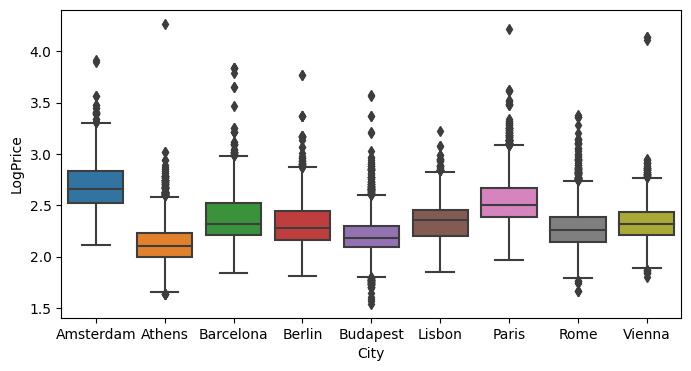

In [4]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,4)
sns.boxplot(data = data, x='City', y='LogPrice')
plt.show()

Text(0.5, 1.0, 'City Count')

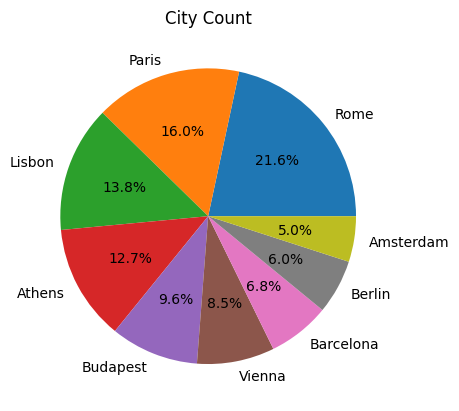

In [5]:
count_city = data['City'].value_counts()
plt.pie(count_city, labels = count_city.index, autopct='%1.1f%%')
plt.title('City Count')

In [6]:
data['City'].value_counts()

Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: City, dtype: int64

## Normalizing prices with GDP per Capita

In [7]:
GDPs_per_capita = {'Paris': 43659.0,
                   'Athens': 20192.6,
                   'Amsterdam': 57767.9,
                   'Lisbon': 24567.5,
                   'Barcelona': 30103.5,
                   'Rome':35657.5,
                   'Berlin': 51203.6,
                   'Vienna' : 53637.7,
                   'Budapest': 18728.1}

In [8]:
data['Price_per_GDP'] = data.apply(lambda x: x['Price']/GDPs_per_capita[x['City']], axis=1)
data['LogPrice_per_GDP'] = np.log10(data['Price_per_GDP'])

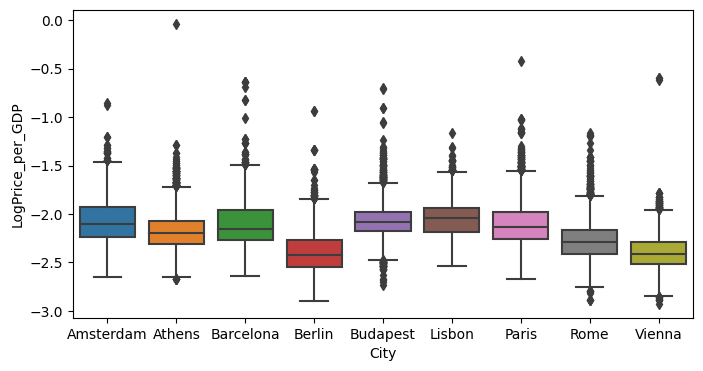

In [9]:
fig, ax = plt.subplots(1)
fig.set_size_inches(8,4)
sns.boxplot(data = data, x='City', y='LogPrice_per_GDP')
plt.show()

#### Limpando Dados Normalized

In [10]:
data = data.drop(columns=['Normalised Attraction Index', 'Normalised Restraunt Index']).copy()

In [13]:
data.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Restraunt Index', 'LogPrice', 'Price_per_GDP', 'LogPrice_per_GDP'],
      dtype='object')

## Analyzing each county separately

In [14]:
data_amsterdam = data.loc[data['City'] == 'Amsterdam'].copy()
data_athens = data.loc[data['City'] == 'Athens'].copy()
data_paris = data.loc[data['City'] == 'Paris'].copy()

In [18]:
DATA_DIR = pathlib.Path.cwd().parent / 'data' /'processed'
print(DATA_DIR)

c:\Users\sarah\Documents\6sem\MachineLearning\projeto\AirbnbPrice_Prediction\data\processed


In [19]:
processed_file_amsterdam_path = DATA_DIR / 'data_amsterdam.pkl'
processed_file_athens_path = DATA_DIR / 'data_athens.pkl'
processed_file_paris_path = DATA_DIR / 'data_paris.pkl'

In [20]:
with open(processed_file_amsterdam_path, 'wb') as file:
    pickle.dump(
        [
            data_amsterdam,
            continuous_variables,
            discrete_variables,
            ordinal_variables,
            categorical_variables,
        ],
        file,
    )

In [21]:
with open(processed_file_athens_path, 'wb') as file:
    pickle.dump(
        [
            data_athens,
            continuous_variables,
            discrete_variables,
            ordinal_variables,
            categorical_variables,
        ],
        file,
    )

In [22]:
with open(processed_file_paris_path, 'wb') as file:
    pickle.dump(
        [
            data_paris,
            continuous_variables,
            discrete_variables,
            ordinal_variables,
            categorical_variables,
        ],
        file,
    )